In [1]:
# Importação dos pacotes
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from scipy.interpolate import UnivariateSpline # curva sigmoide suavizada
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação do modelo logístico binário
from statstests.process import stepwise # procedimento Stepwise
from scipy import stats # estatística chi2
import plotly.graph_objects as go # gráficos 3D
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from statsmodels.discrete.discrete_model import MNLogit # estimação do modelo

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score
                                                        #logístico multinomial
import warnings
warnings.filterwarnings('ignore')

## EXEMPLO 1 - Logística Binária
- variável dependente: qualitativa com 2 variáveis (Dummy)
- distribuição: Bernoulli (sim ou não, tem ou não tem, presente ou ausente)

In [2]:
df_atrasado = pd.read_csv('/home/usp_ds_analytics/logistic_models/data/atrasado.csv',delimiter=',')
df_atrasado.tail()

,estudante,atrasado,dist,sem
95,Sheila,1,24.0,10
96,Pedro,1,10.0,10
97,Horacio,1,9.4,10
98,Leandro,1,14.2,10
99,Estela,1,1.0,13


In [3]:
# Características das variáveis do dataset
df_atrasado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    int64  
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [4]:
# Estatísticas univariadas
df_atrasado.describe()

,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000


In [5]:
# In[1.1]: Tabela de frequências absolutas da variável 'atrasado'
df_atrasado['atrasado'].value_counts().sort_index()

atrasado
0    41
1    59
Name: count, dtype: int64

Balanceamento das variáveis: temos 41 0 (não) e 59 1 (sim).

Down sampling, over sampling (SMOTE, cria dados sintéticos)... cuidado com isso

In [6]:
# In[1.2]: Estimação de um modelo logístico binário pela função 'smf.glm'
#('statsmodels.formula.api')
modelo_atrasos = smf.glm(formula='atrasado ~ dist + sem', 
                         data=df_atrasado,
                         family=sm.families.Binomial()).fit()

# Parâmetros do 'modelo_atrasos'
modelo_atrasos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50.466
Date:                Fri, 06 Sep 2024   Deviance:                       100.93
Time:                        22:03:48   Pearson chi2:                     86.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2913
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.1665      8.442     -3.100      0.002     -42.712      -9.621
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

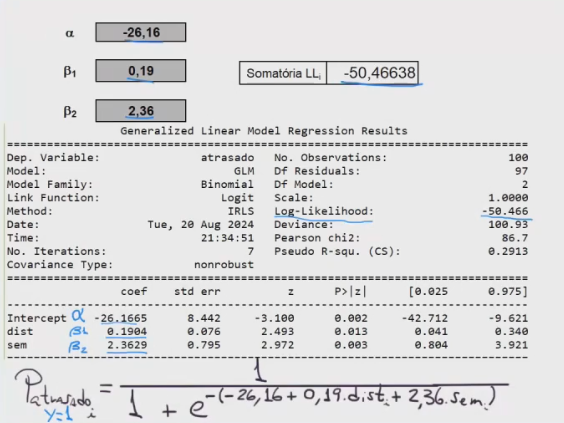

In [7]:
# In[1.3]: Outputs do modelo pela função 'summary_col'
summary_col([modelo_atrasos],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.3f}".format(x.llf)
        })

,MODELO
Intercept,-26.1665***
,(8.4420)
dist,0.1904**
,(0.0764)
sem,2.3629***
,(0.7951)
N,100
Log-lik,-50.466


### Estimação de um modelo logístico bonário pela função 'Logit.from_formula'

In [21]:
modelo_atrasos2 = sm.Logit.from_formula('atrasado ~ dist + sem',
                                        data=df_atrasado).fit()

modelo_atrasos2.summary()

Optimization terminated successfully.
         Current function value: 0.504664
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:                  0.2544
Time:                        10:52:24   Log-Likelihood:                -50.466
converged:                       True   LL-Null:                       -67.686
Covariance Type:            nonrobust   LLR p-value:                 3.324e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.1665      8.442     -3.100      0.002     -42.713      -9.620
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

`MLE` é maximum likehood estimation

In [22]:
# Loglike
modelo_atrasos2.llf

np.float64(-50.46637954189868)

### Modelo nulo
Vamos eliminar os betas, manteremos apenas alfa no modelo, para fins didáticos

In [23]:
# Cálculo do Chi2 (análogo ao teste F da estimação por OLS)
modelo_nulo = sm.Logit.from_formula('atrasado ~ 1',
                                        data=df_atrasado).fit()

modelo_nulo.summary()

Optimization terminated successfully.
         Current function value: 0.676859
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Sat, 07 Sep 2024   Pseudo R-squ.:               1.389e-10
Time:                        10:59:32   Log-Likelihood:                -67.686
converged:                       True   LL-Null:                       -67.686
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3640      0.203      1.790      0.073      -0.035       0.762
==============================================================================
"""

In [24]:
# Loglike do modelo nulo
modelo_nulo.llf

np.float64(-67.68585467349509)

In [26]:
chi2 = -2*(modelo_nulo.llf - modelo_atrasos2.llf)
chi2

np.float64(34.43895026319281)

In [27]:
# p-value do chi2
pvalue = stats.distributions.chi2.sf(chi2, 2)
pvalue

np.float64(3.324122110588685e-08)

**LLR (Likelihood Ratio) p-value**

- is used to assess the significance of the model as a whole 
- The test compares the likelihood of the full model (with all predictors) to the likelihood of a reduced model (with no predictors, i.e., the intercept-only model)
- it measures the probability of obtaining the observed (or more extreme) difference in likelihood between the full and reduced models by chance

**Interpretation:**

- A small p-value (≤ 0.05) indicates that the observed difference in likelihood between the full and reduced models is statistically significant. 
- This suggests that the full model (with predictors) is a better fit to the data than the reduced model (with no predictors).

**Practical interpretation:**

- The tiny p-value suggests that the logistic regression model with predictors is a significantly better fit to the data than a model with no predictors
- In other words, the model with predictors is doing a much better job of predicting the outcome variable than a model with no predictors.
- Keep in mind that this p-value only indicates the overall significance of the model, not the significance of individual predictors.
- To assess the significance of individual predictors, you'll need to examine the p-values associated with each predictor's coefficient in the model.

### Predict
Qual a probabilidade média de se chegar atrasado quando o trajeto tem 7 km e passa-se por 10 semáforos no percurso?

In [28]:
modelo_atrasos.predict(pd.DataFrame({'dist':[7], 'sem':[10]}))

0    0.230566
dtype: float64

Esse é o logito ou já é a probabilidade?

In [29]:
# Cálculo da probabilidade
prob = (1)/(1 + np.exp(-(-26.1665 + 0.1904*7 + 2.3629*10)))
prob

np.float64(0.23064016805378282)

É a probabilidade!

In [9]:
# Adicionando os valores previstos de probabilidade na base de dados
df_atrasado['phat'] = modelo_atrasos.predict()

# Visualização da base de dados com a variável 'phat'
df_atrasado.head()

,estudante,atrasado,dist,sem,phat
0,Gabriela,0,12.5,7,0.000712
1,Patricia,0,13.3,10,0.498561
2,Gustavo,0,13.4,8,0.008903
3,Leticia,0,23.5,7,0.005751
4,Luiz Ovidio,0,9.5,8,0.004257


<function matplotlib.pyplot.show(close=None, block=None)>

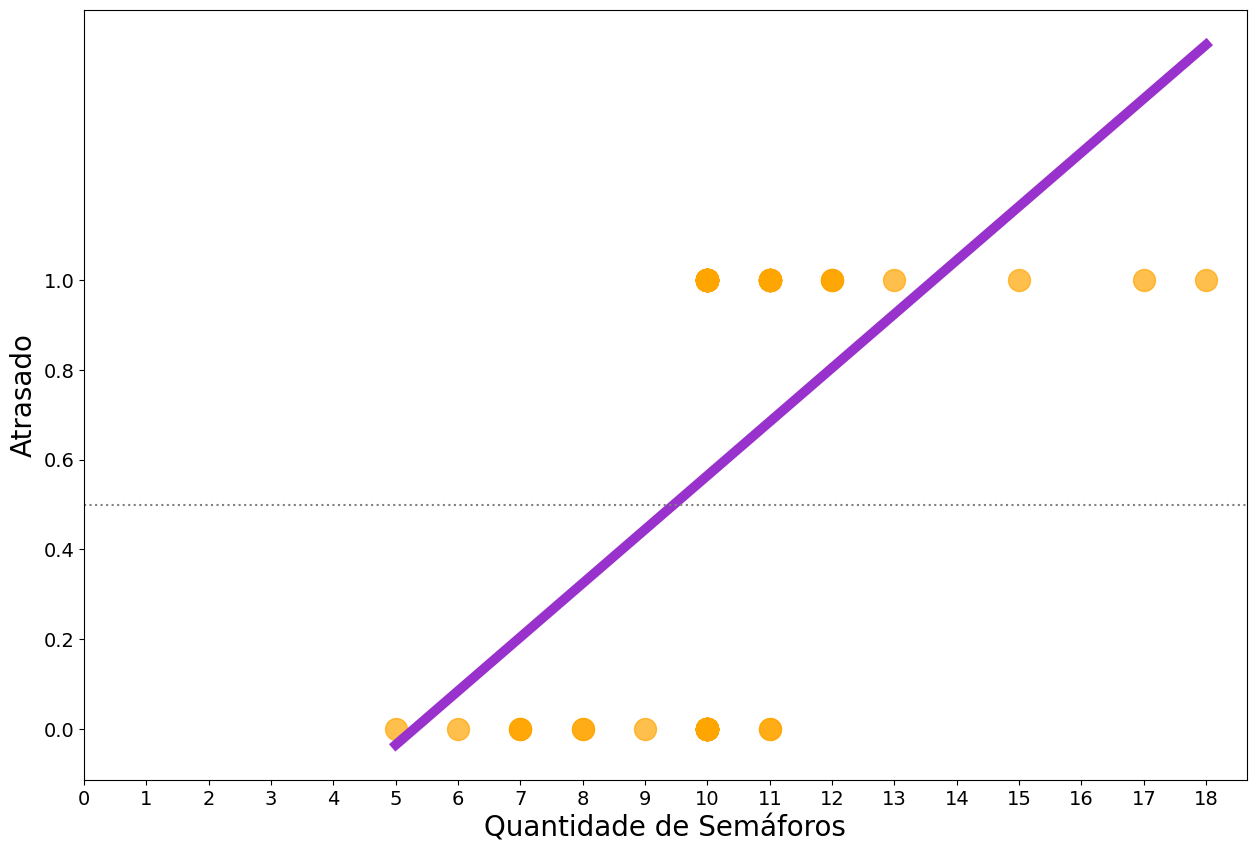

In [10]:
# In[1.6]: Gráficos com ajustes entre a variável dependente e a variável 'sem'
# Ajuste linear entre a variável dependente e a variável 'sem' (Gráfico errado:
#apenas para fins didáticos)
plt.figure(figsize=(15,10))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['atrasado'],
            ci=None, marker='o',
            scatter_kws={'color':'orange', 's':250, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=20)
plt.ylabel('Atrasado', fontsize=20)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

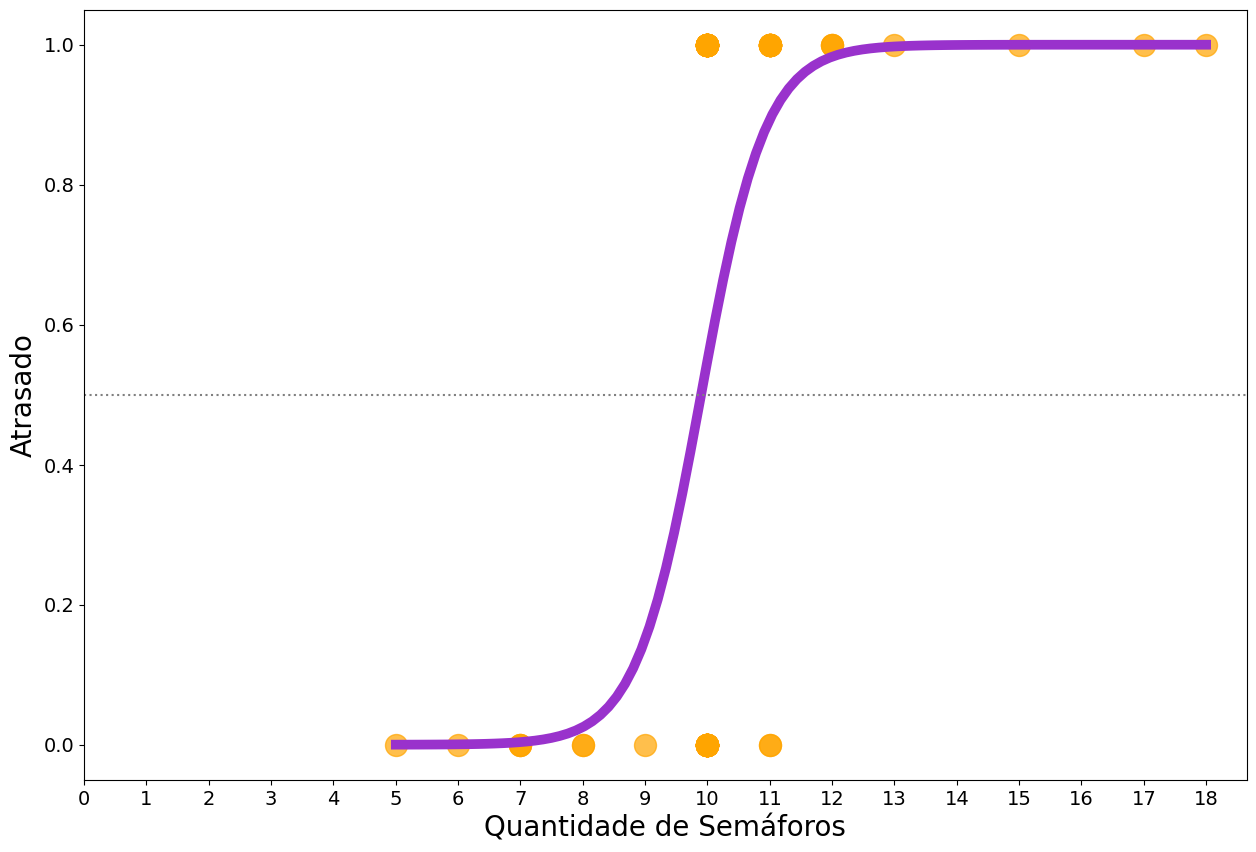

In [11]:
# In[1.7]: Ajuste logístico determinístico entre a variável dependente e a
#variável 'sem' Sigmoide
plt.figure(figsize=(15,10))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['atrasado'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':250, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=20)
plt.ylabel('Atrasado', fontsize=20)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

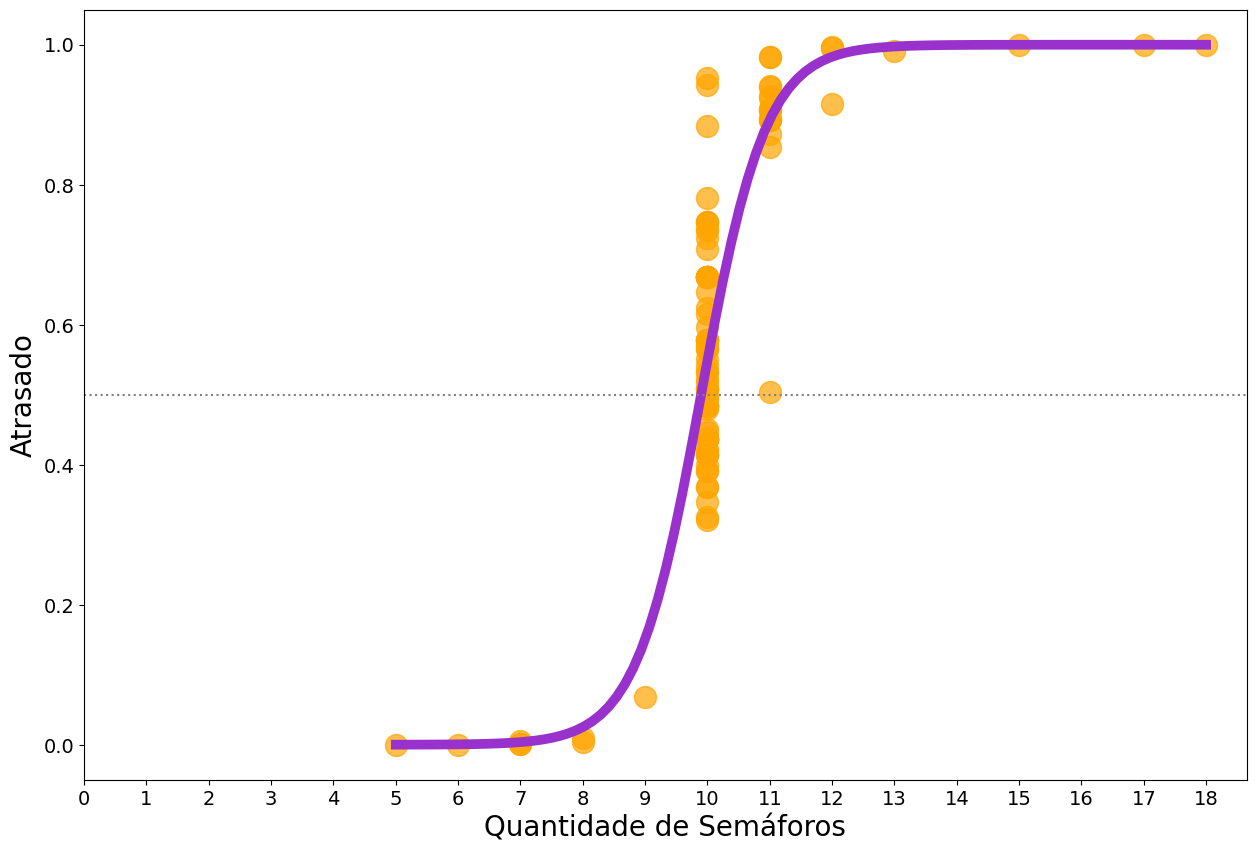

In [12]:
# In[1.8]: Ajuste logístico probabilístico entre a variável dependente e a
#variável 'sem'

# Sigmoide
plt.figure(figsize=(15,10))
sns.regplot(x=df_atrasado['sem'], y=df_atrasado['phat'],
            ci=None, marker='o', logistic=True,
            scatter_kws={'color':'orange', 's':250, 'alpha':0.7},
            line_kws={'color':'darkorchid', 'linewidth':7})
plt.axhline(y = 0.5, color = 'grey', linestyle = ':')
plt.xlabel('Quantidade de Semáforos', fontsize=20)
plt.ylabel('Atrasado', fontsize=20)
plt.xticks(np.arange(0, df_atrasado['sem'].max() + 0.01),
           fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show

### Construção de uma matriz de confusão

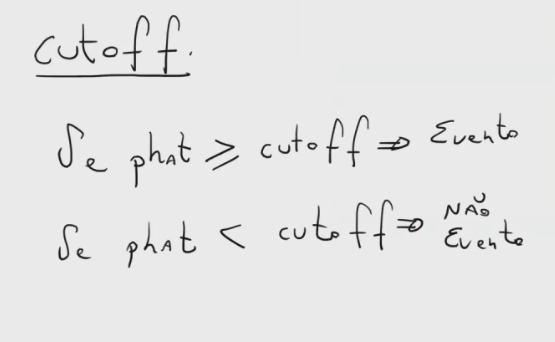

In [13]:
# Construção de função para a definição da matriz de confusão
def matriz_confusao(predicts, observado, cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
        
    for item in values:
        if item < cutoff:
            predicao_binaria.append(0)
        else:
            predicao_binaria.append(1)
           
    cm = confusion_matrix(predicao_binaria, observado)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.xlabel('True')
    plt.ylabel('Classified')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.show()
        
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidade = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    # Visualização dos principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidade],
                                'Acurácia':[acuracia]})
    return indicadores


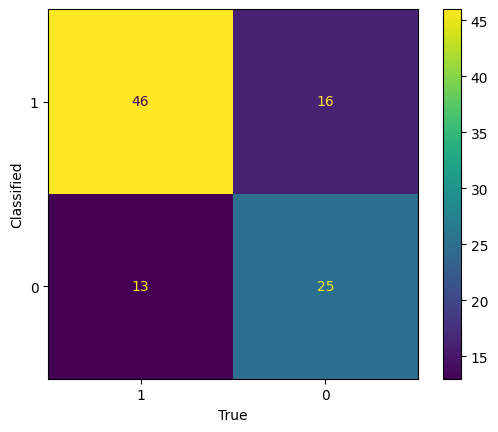

,Sensitividade,Especificidade,Acurácia
0,0.779661,0.609756,0.71


In [14]:
# Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.5)

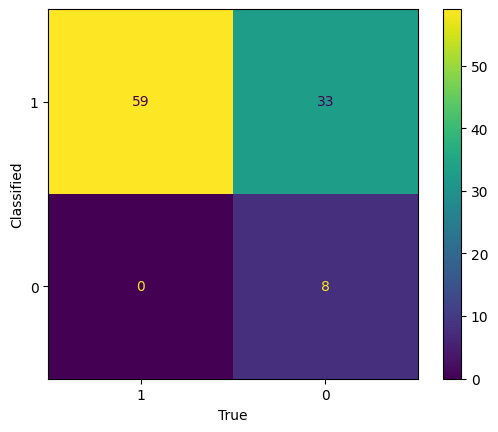

,Sensitividade,Especificidade,Acurácia
0,1.0,0.195122,0.67


In [15]:
# Matriz de confusão para cutoff = 0.3
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.3)

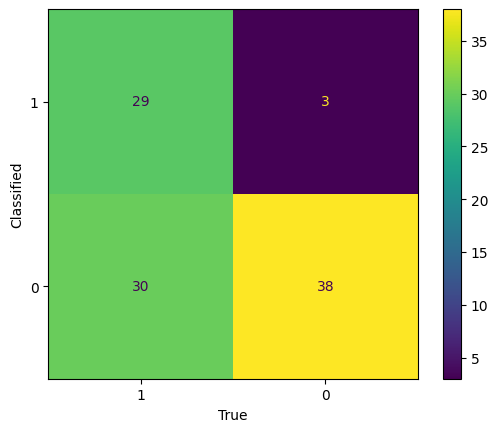

,Sensitividade,Especificidade,Acurácia
0,0.491525,0.926829,0.67


In [16]:
# Matriz de confusão para cutoff = 0.7
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.7)

> continuar em 45'30"
https://class.movelms.com/class_v2?t=ce05483a753eb5f36d381d6273634b0e

### Igualando critérios de especificidade e de sensitividade

In [17]:
# Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

# ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA, o procedimento garante a maximização da acurácia do modelo!

# Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):
    
    # Adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # Range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [18]:
# In[1.12]: Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados (dataframe 'dados_plotagem')

dados_plotagem = espec_sens(observado = df_atrasado['atrasado'],
                            predicts = df_atrasado['phat'])
dados_plotagem.head()

,cutoffs,sensitividade,especificidade
0,0.00,1.0,0.000000
1,0.01,1.0,0.170732
2,0.02,1.0,0.170732
3,0.03,1.0,0.170732
4,0.04,1.0,0.170732


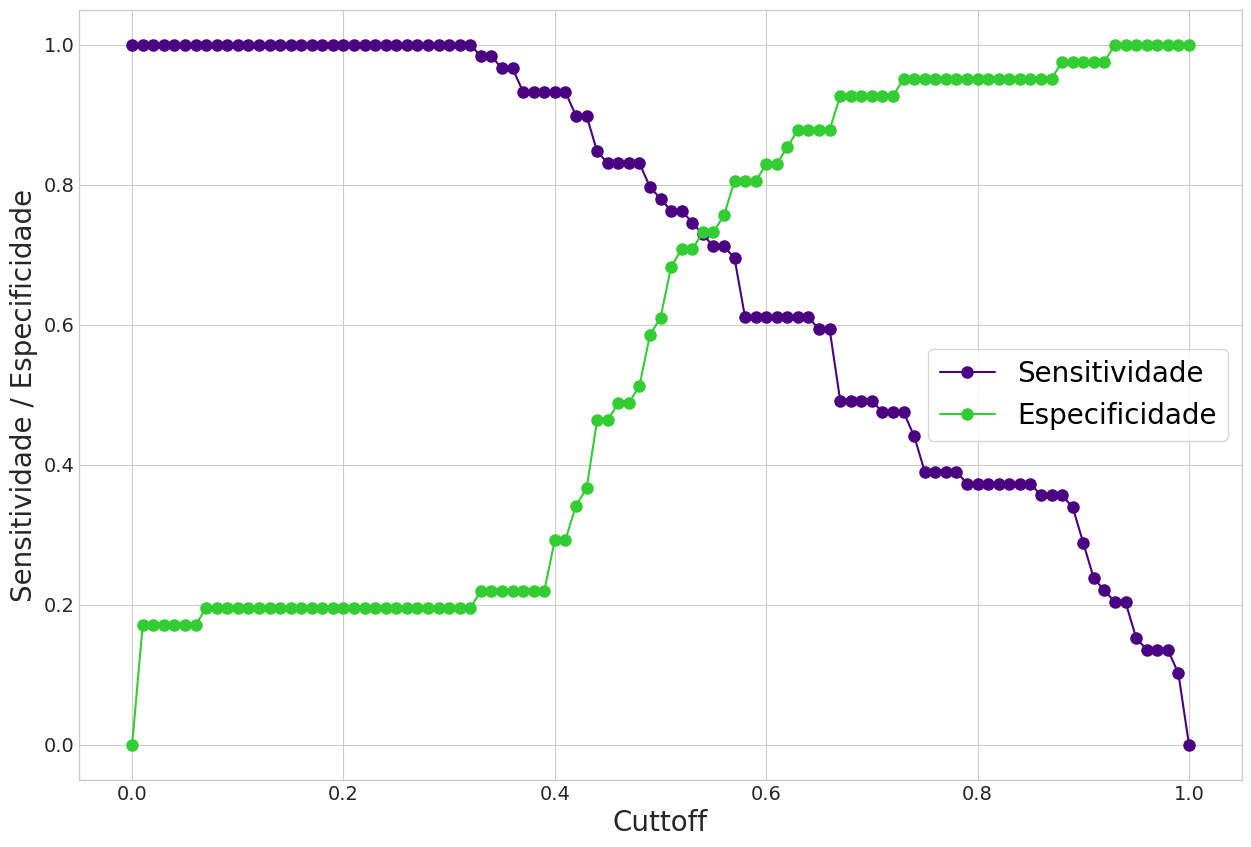

In [19]:
# In[1.13]: Plotagem de um gráfico que mostra a variação da especificidade e da
#sensitividade em função do cutoff

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, marker='o',
         color='indigo', markersize=8)
    plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, marker='o',
         color='limegreen', markersize=8)
plt.xlabel('Cuttoff', fontsize=20)
plt.ylabel('Sensitividade / Especificidade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.legend(['Sensitividade', 'Especificidade'], fontsize=20)
plt.show()

### Construção da curva ROC

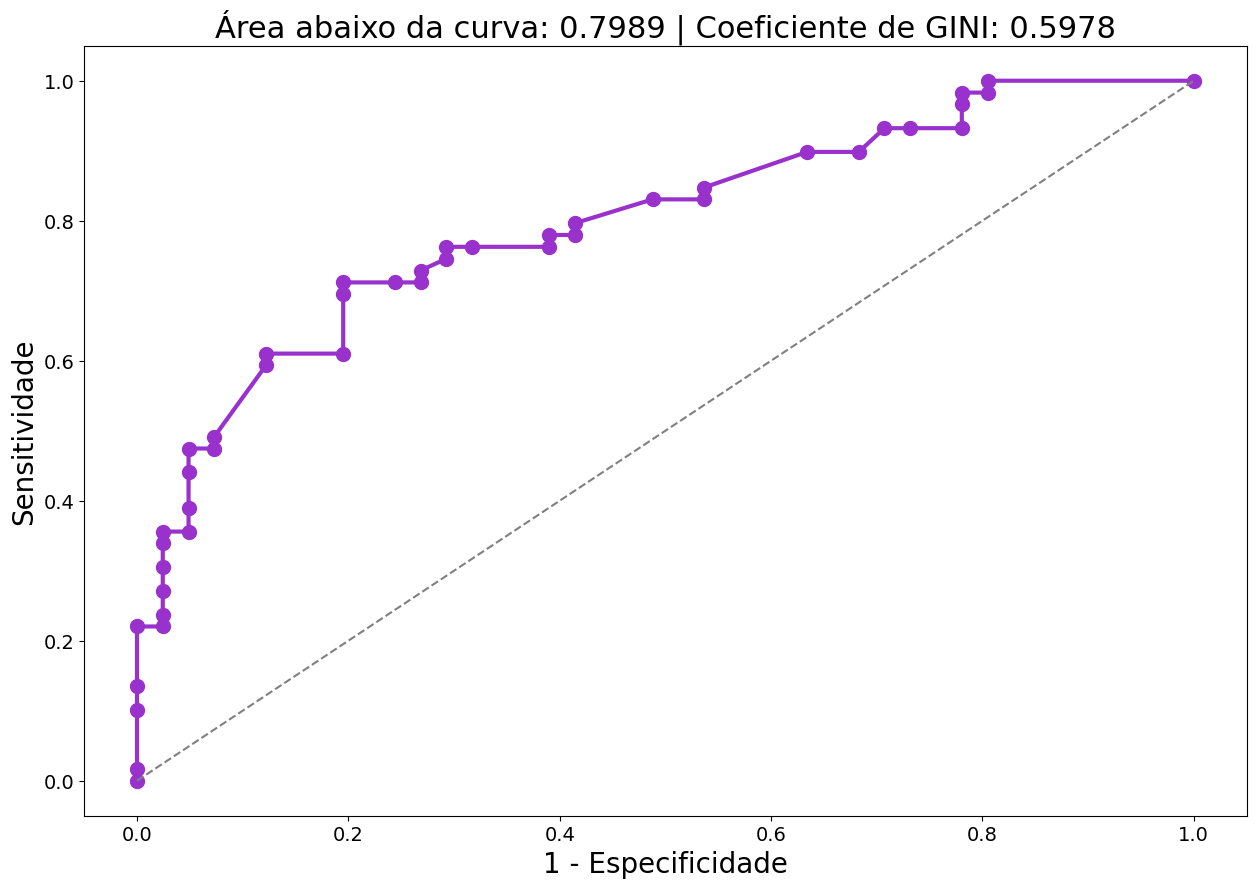

In [20]:
from sklearn.metrics import roc_curve, auc

# Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_atrasado['atrasado'], df_atrasado['phat'])
roc_auc = auc(fpr, tpr)

# Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

# Plotando a curva ROC
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, marker='o', color='darkorchid', markersize=10, linewidth=3)
plt.plot(fpr, fpr, color='gray', linestyle='dashed')
plt.title('Área abaixo da curva: %g' % round(roc_auc, 4) +
          ' | Coeficiente de GINI: %g' % round(gini, 4), fontsize=22)
plt.xlabel('1 - Especificidade', fontsize=20)
plt.ylabel('Sensitividade', fontsize=20)
plt.xticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.yticks(np.arange(0, 1.1, 0.2), fontsize=14)
plt.show()